<a href="https://colab.research.google.com/github/vishal-pandey/iot-transfer/blob/master/shanghai-cnn-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
URL_shanghai = "https://github.com/vishal-pandey/iot-transfer/raw/master/pm25_shanghai.csv"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
df_shanghai = pd.read_csv(URL_shanghai)

In [0]:
pm25_shanghai = df_shanghai.iloc[:, 0].values

In [0]:
pm25_shanghai = pm25_shanghai.reshape(-1, 1)

In [0]:
scaler_shanghai = StandardScaler()
scaler_shanghai.fit(pm25_shanghai)
pm25_shanghai = scaler_shanghai.transform(pm25_shanghai)

In [0]:
N = 20
O = 5
P = 20

In [0]:
X_shanghai = []
y_shanghai = []

for i in range(len(pm25_shanghai) - (N + O + P)):
  temp = []
  temp1 = pm25_shanghai[i : i+N]
  temp2 = [0 for _ in range(O)]
  temp3 = pm25_shanghai[i+N+O : i+N+O+P]
  X_shanghai.append(np.append(np.append(temp1, temp2), temp3))
  y_shanghai.append(pm25_shanghai[i+N : i+N+O].reshape(O))

In [0]:
X_shanghai = np.array(X_shanghai)
y_shanghai = np.array(y_shanghai)

In [11]:
print(X_shanghai.shape)
print(y_shanghai.shape)

(555, 45)
(555, 5)


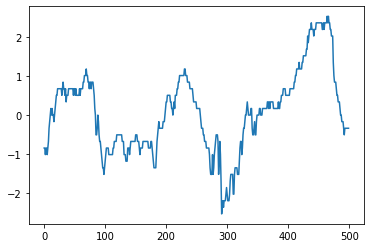

In [13]:
plt.plot(pm25_shanghai[:500])
plt.show()

In [0]:
X_shanghai_train, X_shanghai_test, y_shanghai_train, y_shanghai_test = train_test_split(X_shanghai, y_shanghai)

In [0]:
X_shanghai_train = X_shanghai_train.reshape(X_shanghai_train.shape[0], -1, 1)
X_shanghai_test = X_shanghai_test.reshape(X_shanghai_test.shape[0], -1, 1)

In [16]:
from keras.layers import LSTM, Bidirectional, Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

Using TensorFlow backend.


In [17]:
X_shanghai_train.shape

(416, 45, 1)

In [18]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_shanghai_train.shape[1],X_shanghai_train.shape[2])))
model.add(MaxPooling1D())
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [19]:
model.fit(X_shanghai_train, y_shanghai_train, epochs=20, validation_data=(X_shanghai_test, y_shanghai_test))




Train on 416 samples, validate on 139 samples
Epoch 1/20





416/416 [==============================] - 1s 2ms/step - loss: 0.6342 - acc: 0.1923 - val_loss: 0.1400 - val_acc: 0.1655
Epoch 2/20
416/416 [==============================] - 0s 249us/step - loss: 0.1363 - acc: 0.2043 - val_loss: 0.0934 - val_acc: 0.3309
Epoch 3/20
416/416 [==============================] - 0s 232us/step - loss: 0.0930 - acc: 0.4135 - val_loss: 0.0708 - val_acc: 0.3597
Epoch 4/20
416/416 [==============================] - 0s 234us/step - loss: 0.0790 - acc: 0.3245 - val_loss: 0.0673 - val_acc: 0.2518
Epoch 5/20
416/416 [==============================] - 0s 215us/step - loss: 0.0620 - acc: 0.3317 - val_loss: 0.0484 - val_acc: 0.2446
Epoch 6/20
416/416 [==============================] - 0s 213us/step - loss: 0.0503 - acc: 0.3558 - val_loss: 0.0431 - val_acc: 0.2806
Epoch 7/20
416/416 [==============================] - 0s 203us/step - loss: 0.0447 - acc: 0.3798 - val_loss: 0.0421 - val_acc: 0.3165
Epoch 8/20

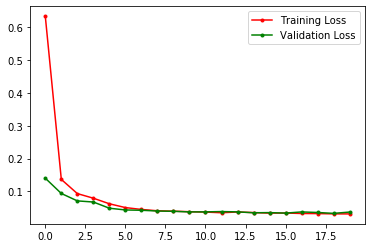

In [20]:
plt.plot(model.history.history['loss'], 'r.-', label="Training Loss")
plt.plot(model.history.history['val_loss'], 'g.-', label="Validation Loss")
plt.legend()
plt.show()

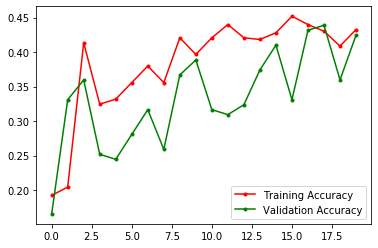

In [21]:
plt.plot(model.history.history['acc'], 'r.-', label="Training Accuracy")
plt.plot(model.history.history['val_acc'], 'g.-', label="Validation Accuracy")
plt.legend()
plt.show()

In [0]:
model.save('pm25_shanghai_cnn_model.h5')